## Project Environment Setup
### Assume a gray-scale image with M * N pixels. An object of size L1 * L2 located inside the image.

In [1]:
# Fixed Parameters
M = 100
N = 68

L1 = 20
L2 = 12

In [2]:
# Import Library
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Situation 1 
### Mean noise level miu = 0.2, No Rotation, A = 1 ,sigma_square is known
### Estimate the center position of the box

In [3]:
miu = 0.2
A = 1
sigma = 0.1
# Set the center position of the box, plot the image we need for estimation
m0 = 50
n0 = 38
theta = 0.2*np.pi
R_mat = [[np.cos(theta),-1*np.sin(theta)],
         [np.sin(theta),np.cos(theta)]]

Text(0.5,1,'Generated Image Sample')

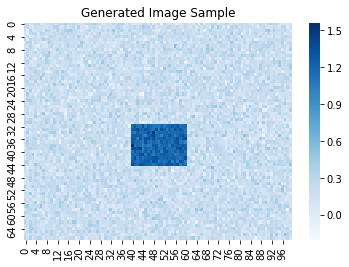

In [4]:
background = sigma * np.random.randn(N,M) + miu
object_a = np.zeros([N,M])

for i in range (N):
    for j in range (M):
        if abs(i-n0)<=(L2/2) and abs(j-m0)<=(L1/2):
            object_a[i][j]= 1
            #background[i][j]=0
image_1 = background+A*object_a
#plt.gray()
sns.heatmap(image_1,cmap="Blues")
plt.title("Generated Image Sample")

#plt.imshow(image_1, cmap="hot")

## Do Grid Search to find the MLE

In [6]:
sum_results = []
sum_index = []
for n0_hat in range(int(L2/2-1),int(N-L2/2)):
    for m0_hat in range(int(L1/2-1),int(M-L1/2)):
        object_sim = np.zeros((N,M))
        result = 0
        for i in range (N):
            for j in range (M):
                if abs(i-n0_hat)<=(L2/2) and abs(j-m0_hat)<=(L1/2):
                        object_sim[i,j]= 1        
                result = result + (image_1[i,j] - object_sim[i,j]-miu)**2
        sum_results.append(result)
        sum_index.append([n0_hat, m0_hat])


In [7]:
[n0_est,m0_est] = sum_index[np.argmin(sum_results)]
print("The estimated center position is ", [n0_est,m0_est])

The estimated center position is  [38, 50]


In [11]:
object_sim = np.zeros((N,M))
min_err = 0
for i in range (N):
    for j in range (M):
        if abs(i-n0_est)<=(L2/2) and abs(j-m0_est)<=(L1/2):
                object_sim[i,j]= 1        
        min_err = min_err + (image_1[i,j] - object_sim[i,j]-miu)**2


In [12]:
min_err

67.20376455892524

## Situation 2
### Mean noise level miu = 0.2, No Rotation, A = 1, sigma_square is unknown
### Estimate the center position (m0, n0)  and sigma_square

In [13]:
sigma_square_est = min_err/(M*N)
sigma_est = np.sqrt(sigma_square_est)
print(" The Estimated sigma square is: ", sigma_est**2)

 The Estimated sigma square is:  0.009882906552783125


## Situation 3
### Mean noise level miu = 0.2, No Rotation, A unknown, sigma_square is unknown
### Estimate the center position (m0, n0),  sigma_square and A

In [14]:
sum_results = []
sum_index = []
for n0_hat in range(int(L2/2-1),int(N-L2/2)):
    for m0_hat in range(int(L1/2-1),int(M-L1/2)):
        object_sim = np.zeros((N,M))
        A_1 = 0
        A_2 = 0
        for i in range(N):
            for j in range(M):
                if abs(i-n0_hat)<=(L2/2) and abs(j-m0_hat)<=(L1/2):
                        object_sim[i,j]= 1                   
                A_1 = A_1 + (image_1[i,j]-miu)*object_sim[i,j]
                A_2 = A_2 + object_sim[i,j]*object_sim[i,j]
        result = 0
        for x in range(N):
            for y in range(M):
                result = result +(image_1[x,y] - (A_1/A_2)*object_sim[x,y]-miu)**2        
        sum_results.append(result)
        sum_index.append([n0_hat, m0_hat])

In [15]:
[n0_est,m0_est] = sum_index[np.argmin(sum_results)]
print("The estimated center position is ", [n0_est,m0_est])

The estimated center position is  [38, 50]


In [17]:
object_sim = np.zeros((N,M))
A_1_est = 0
A_2_est = 0
for i in range(N):
    for j in range(M):
        if abs(i-n0_est)<=(L2/2) and abs(j-m0_est)<=(L1/2):
                object_sim[i,j]= 1                   
        A_1_est = A_1_est + (image_1[i,j]-miu)*object_sim[i,j]
        A_2_est = A_2_est + object_sim[i,j]*object_sim[i,j]
A_est = A_1_est/A_2_est
print(" The Estimated Value of A is:", A_est)

 The Estimated Value of A is: 1.002228406341539


In [19]:
sigma_square_est = min(sum_results)/(M*N)
print(" The Estimated sigma_square is: ", sigma_square_est)

 The Estimated sigma_square is:  0.009882707190726266


## Situation 4
### Mean noise level miu unknown, No Rotation, A unknown, sigma_square is unknown
### Estimate the center position (m0, n0),  sigma_square, A and miu
### Use linear model to solve this problem

In [20]:
"""""""""
First, Caculate matrix H (MN*2). 
Second, Caculate the estimated Theta(A and miu) .
Last, Do Grid Search to maximize (X-H*Theta)T(X-H*Theta)

"""""""""
X_image = np.transpose(np.matrix(image_1).flatten('F'))  
sum_results_4 = []
sum_index_4 = []
for n0_hat in range(int(L2/2-1),int(N-L2/2)):
    for m0_hat in range(int(L1/2-1),int(M-L1/2)):
        object_sim = np.zeros((N,M))
        for i in range(N):
            for j in range(M):
                if abs(i-n0_hat)<=(L2/2) and abs(j-m0_hat)<=(L1/2):
                        object_sim[i,j]= 1        
        g = np.transpose(np.matrix(object_sim).flatten('F'))            
        I = np.transpose(np.matrix(np.ones([M,N])).flatten('F')) 
        H = np.concatenate((g,I), axis=1)
        Theta = np.linalg.inv(np.transpose(H)*H)*np.transpose(H)*X_image
        square_err = np.transpose(X_image - H*Theta)*(X_image - H*Theta)
        sum_results_4.append(square_err)
        sum_index_4.append([n0_hat, m0_hat])

In [21]:
[n0_est,m0_est] = sum_index_4[np.argmin(sum_results_4)]
print("The estimated center position is ", [n0_est,m0_est])

The estimated center position is  [38, 50]


In [25]:
sigma_square_est = min(sum_results_4)/(M*N)
print(" The Estimated sigma square is: ", sigma_square_est)
sigma_est = np.sqrt(sigma_square_est)

 The Estimated sigma square is:  [[0.00988156]]


In [23]:
object_sim = np.zeros((N,M))
for i in range(N):
    for j in range(M):
        if abs(i-n0_est)<=(L2/2) and abs(j-m0_est)<=(L1/2):
                object_sim[i,j]= 1        
g = np.transpose(np.matrix(object_sim).flatten('F'))            
I = np.transpose(np.matrix(np.ones([M,N])).flatten('F')) 
H = np.concatenate((g,I), axis=1)
Theta_est = np.linalg.inv(np.transpose(H)*H)*np.transpose(H)*X_image
A_est = Theta_est[0]
miu_est = Theta_est[1]
print(" The Estimated A is: ", A_est)
print(" The Estimated miu is: ", miu_est)

 The Estimated A is:  [[1.00332327]]
 The Estimated miu is:  [[0.19890513]]


Text(0.5,1,' New Generated Image Sample Using Estimated Parameters')

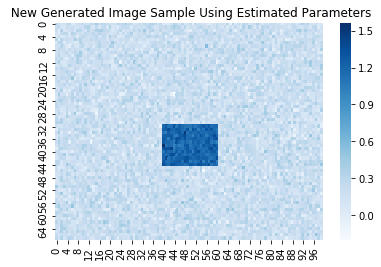

In [32]:
# Fixed Parameters
M = 100
N = 68

L1 = 20
L2 = 12
background_est = np.asscalar(sigma_est) * np.random.randn(N,M) + np.asscalar(miu_est)
object_a_est = np.zeros([N,M])

for i in range (N):
    for j in range (M):
        if abs(i-n0_est)<=(L2/2) and abs(j-m0_est)<=(L1/2):
            object_a_est[i][j]= 1
            #background[i][j]=0
image_1_est = background+np.asscalar(A_est)*object_a_est
#plt.gray()
sns.heatmap(image_1_est,cmap="Blues")
plt.title(" New Generated Image Sample Using Estimated Parameters")